In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['fivethirtyeight', 'figsize'])
_SAVEDIR_ = 'Tex/figures/'


def prog_bar(cur_val,max_val,msg = ""):
    import sys
    sys.stdout.write('\r')
    eq = int(np.ceil(np.true_divide(cur_val*100,max_val*5)))
    sys.stdout.write("[{:20s}] {}/{} {:}  ".format('='*eq, cur_val+1,max_val,msg))
    sys.stdout.flush()


In [2]:
%%time
for i in range(2000):
    prog_bar(i,2000,msg='steps')

[====================] 2000/2000 steps  Wall time: 1.71 s


In [3]:
%%time
for i in range(2000):
    ;

Wall time: 0 ns


In [44]:
lx=100;
ly=40;
w=np.array([4/9,1/9,1/9,1/9,1/9,1/36,1/36,1/36,1/36])
ex=[0,1,0,-1,0 ,1,-1,-1, 1];
ey=[0,0,1,0 ,-1,1, 1,-1,-1];
tau=1;
g=10**-4;
cs=1/np.sqrt(3)
tstep=100
Nsteps = tstep
tplot=100

# % arrays
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
f=np.zeros([Nsteps, 9,lx,ly]);
opp=[0, 3, 4, 1, 2, 7, 8, 5, 6]
# print(np.array(opp)-1)


for k in range(0,9):
    f[0,k,:,:] = w[k]*rho

In [225]:
def calc_macro(f,rho,u,v):
    # f should be at a given time step
    u[:,:] = 0
    v[:,:] = 0
    rho = np.sum(f,axis=0)
    for k in range(9):
        v += f[k]*ex[k]
        u += f[k]*ey[k]
    u=u/rho
    v=v/rho
    return rho, u ,v
# def collision(f, rho,u,v):
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
for k in range(0,9):
    f[0,k,:,:] = w[k]*rho
for ts in range(1,100):
    
    # Calc Macro Quantities
    rho, u, v = calc_macro(f[ts-1],rho,u,v)

    # Collision
    for i in range(lx):
        for j in range(ly):
            u[i,j]=u[i,j] + g*tau/rho[i,j];
            for k in range(9):
                cu=(1/cs**2)*(ex[k]*u[i,j] + ey[k]*v[i,j]);
                feq=np.array(rho[i,j]*w[k]*(1 + cu + cu**2 - (u[i,j]**2 + v[i,j]**2)/(2*cs**2)))
#                 print(feq)
                f[ts,k,i,j]=f[ts-1,k,i,j] + (1/tau)*(feq - f[ts-1,k,i,j]);
#                 print(feq - f[ts-1,k,i,j])
#     print(np.isnan(f[0]).any())

    for i in range(lx):
        for k in range(9):
            f[ts,k,i,ly-1]=f[ts,opp[k],i,ly-1]
            f[ts,k,i,0]=f[ts,opp[k],i,0]
#     print(np.isnan(f[ts]).any())
    for k in range(9):
        f[ts,k,:,:]=np.roll(f[ts,k,:,:],(ex[k],ey[k]),axis=(0,1))

    
print(np.sum(f[ts],axis=0))

[[ 5582.85064332  5595.16691792  5638.34828998 ...,  4260.53788996
   4240.68421701  5099.17446035]
 [ 5582.85064332  5595.16691792  5638.34828998 ...,  4260.53788996
   4240.68421701  5099.17446035]
 [ 5582.85064332  5595.16691792  5638.34828998 ...,  4260.53788996
   4240.68421701  5099.17446035]
 ..., 
 [ 5582.85064332  5595.16691792  5638.34828998 ...,  4260.53788996
   4240.68421701  5099.17446035]
 [ 5582.85064332  5595.16691792  5638.34828998 ...,  4260.53788996
   4240.68421701  5099.17446035]
 [ 5582.85064332  5595.16691792  5638.34828998 ...,  4260.53788996
   4240.68421701  5099.17446035]]


In [226]:
print(f[ts]-f[0])

[[[ 2455.88763381  2457.54153593  2473.85041615 ...,  1835.58543572
    1831.35229212  2233.95950643]
  [ 2455.88763381  2457.54153593  2473.85041615 ...,  1835.58543572
    1831.35229212  2233.95950643]
  [ 2455.88763381  2457.54153593  2473.85041615 ...,  1835.58543572
    1831.35229212  2233.95950643]
  ..., 
  [ 2455.88763381  2457.54153593  2473.85041615 ...,  1835.58543572
    1831.35229212  2233.95950643]
  [ 2455.88763381  2457.54153593  2473.85041615 ...,  1835.58543572
    1831.35229212  2233.95950643]
  [ 2455.88763381  2457.54153593  2473.85041615 ...,  1835.58543572
    1831.35229212  2233.95950643]]

 [[  646.96616594   581.39057838   573.46863857 ...,   376.47064455
     377.29794212   690.94297333]
  [  646.96616594   581.39057838   573.46863857 ...,   376.47064455
     377.29794212   690.94297333]
  [  646.96616594   581.39057838   573.46863857 ...,   376.47064455
     377.29794212   690.94297333]
  ..., 
  [  646.96616594   581.39057838   573.46863857 ...,   376.47064

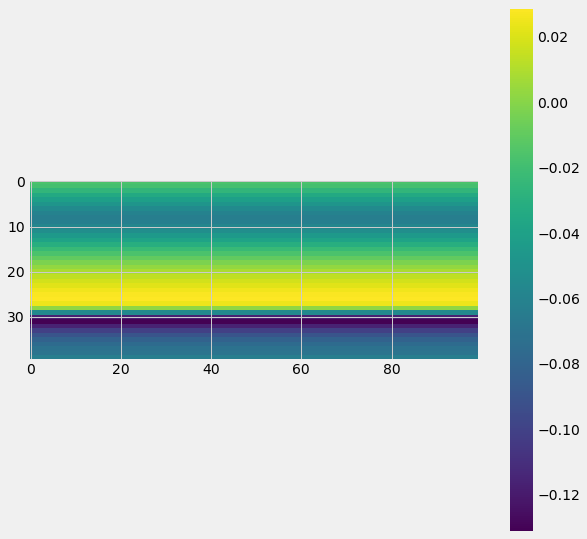

In [229]:
rho, u ,v = calc_macro(f[-1],rho,u,v)
plt.imshow(u.T)
plt.colorbar()
plt.show()


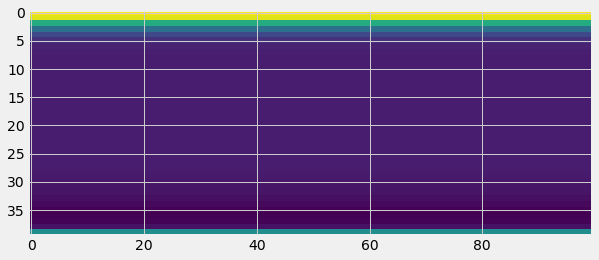

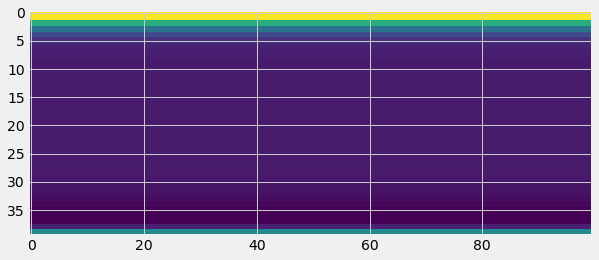

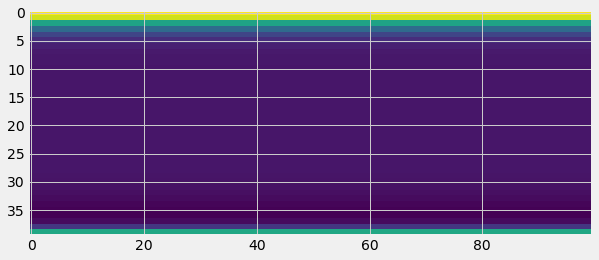

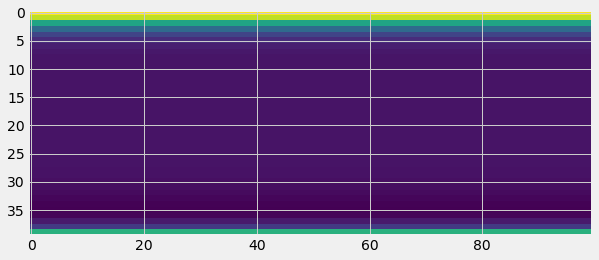

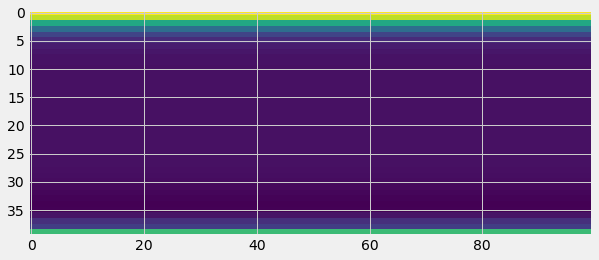

[array([[ 283.69245328,  279.51300591,  250.75957873, ...,  199.33403172,
         202.68189969,  240.30053011],
       [ 283.69245328,  279.51300591,  250.75957873, ...,  199.33403172,
         202.68189969,  240.30053011],
       [ 283.69245328,  279.51300591,  250.75957873, ...,  199.33403172,
         202.68189969,  240.30053011],
       ..., 
       [ 283.69245328,  279.51300591,  250.75957873, ...,  199.33403172,
         202.68189969,  240.30053011],
       [ 283.69245328,  279.51300591,  250.75957873, ...,  199.33403172,
         202.68189969,  240.30053011],
       [ 283.69245328,  279.51300591,  250.75957873, ...,  199.33403172,
         202.68189969,  240.30053011]]), array([[ 284.7121188 ,  284.33201428,  252.65235963, ...,  200.48969809,
         207.38091285,  240.23728129],
       [ 284.7121188 ,  284.33201428,  252.65235963, ...,  200.48969809,
         207.38091285,  240.23728129],
       [ 284.7121188 ,  284.33201428,  252.65235963, ...,  200.48969809,
         207.38

In [180]:
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
# print(f[4])
pt_lst = []
for i in range():
    rho, u ,v = calc_macro(f[i],rho,u,v)
    plt.imshow(rho.T)
    plt.show()
    pt_lst.append(rho)
print(pt_lst)

In [162]:
x = np.array([[1,2,3,4]])
print(np.repeat(x, 3, axis=0))
v=np.zeros([lx,ly])
np.sum(f,axis=0)
for k in range(9):
    v += f[ts,k]*ex[k]
print(v)


[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[ -1.7298455   -7.89312503 -17.42071579 ..., -42.84735762 -27.07741553
  -20.03226774]
 [ -1.7298455   -7.89312503 -17.42071579 ..., -42.84735762 -27.07741553
  -20.03226774]
 [ -1.7298455   -7.89312503 -17.42071579 ..., -42.84735762 -27.07741553
  -20.03226774]
 ..., 
 [ -1.7298455   -7.89312503 -17.42071579 ..., -42.84735762 -27.07741553
  -20.03226774]
 [ -1.7298455   -7.89312503 -17.42071579 ..., -42.84735762 -27.07741553
  -20.03226774]
 [ -1.7298455   -7.89312503 -17.42071579 ..., -42.84735762 -27.07741553
  -20.03226774]]


In [213]:
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
f=np.zeros([Nsteps, 9,lx,ly]);
opp=[0, 3, 4, 1, 2, 7, 8, 5, 6]

for k in range(0,9):
    f[0,k,:,:] = w[k]*rho
print(np.array(w[k]*rho).shape)
for ts in range(1,Nsteps):
    for i in range(lx):
        for j in range(ly):
            rho[i,j]=0
            u[i,j]=0
            v[i,j]=0
            for k in range(9):
                rho[i,j]=rho[i,j]+f[ts-1,k,i,j]
                u[i,j] = u[i,j] + f[ts-1,k,i,j]*ex[k]
                v[i,j]=v[i,j]+f[ts-1,k,i,j]*ey[k]
            u[i,j]=u[i,j]/rho[i,j]
            v[i,j]=v[i,j]/rho[i,j]
#     print(f[0])
    for i in range(lx):
        for j in range(ly):
            u[i,j]=u[i,j] + g*tau/rho[i,j];
            for k in range(9):
                cu=(1/cs**2)*(ex[k]*u[i,j] + ey[k]*v[i,j]);
                feq=rho[i,j]*w[k]*(1 + cu + cu**2 - (u[i,j]**2 + v[i,j]**2)/(2*cs**2));
                f[ts,k,i,j]=f[ts-1,k,i,j] + (1/tau)*(feq - f[ts-1,k,i,j]);
#     print(f[0])
    for i in range(lx):
        for k in range(9):
            f[ts,k,i,ly-1]=f[ts,opp[k],i,ly-1]
            f[ts,k,i,0]=f[ts,opp[k],i,0]
    for k in range(9):
    #     print(f[ts,k,:,:].shape)
        f[ts,k,:,:]=np.roll(f[ts,k,:,:],(ex[k],ey[k]),axis=(0,1))
print(f[-1])

(100, 40)


IndexError: list index out of range

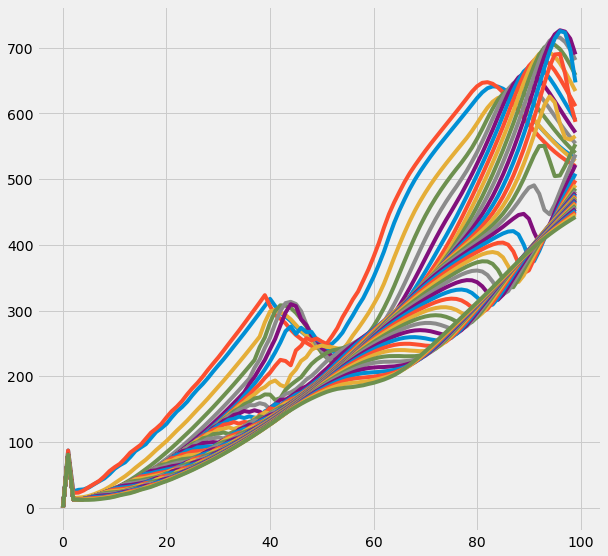

In [117]:
plt.plot(list(range(Nsteps)),np.average(f[:,1],axis=1))
plt.show()

In [50]:

# % main loop

for ts in range(1,tstep):
    if ts%50 == 0:
        print(ts)
#     %% macroscopic
    
    for i in range(lx):
        for j in range(ly):
            rho[i,j]=0;
            u[i,j]=0;
            v[i,j]=0;
            for k in range(9):
                rho[i,j]=rho[i,j]+f[ts-1,k,i,j];
                u[i,j]=u[i,j]+f[ts-1,k,i,j]*ex[k];
                v[i,j]=v[i,j]+f[ts-1,k,i,j]*ey[k];
            u[i,j]=u[i,j]/rho[i,j];
            v[i,j]=v[i,j]/rho[i,j];
# collision
    for i in range(lx):
        for j in range(ly):
            u[i,j]=u[i,j] + g*tau/rho[i,j];
            for k in range(9):
                cu=(1/cs**2)*(ex[k]*u[i,j] + ey[k]*v[i,j]);
                feq=rho[i,j]*w[k]*(1 + cu + cu**2 - (u[i,j]**2 + v[i,j]**2)/(2*cs**2));
                f[ts-1,k,i,j]=f[ts,k,i,j] + (1/tau)*(feq - f[ts-1,k,i,j]);

# %% prepare the next time step
# %%bbboundary

# %north & south
    for i in range(lx):
        for k in range(9):

            f[ts-1,k,i,ly-1]=f[ts-1,opp[k],i,ly-1]
            f[ts-1,k,i,0]=f[ts-1,opp[k],i,0]
    
# %% streaming

#     for k in range(9):
#         f_in(k,:,:)=circshift(fout(k,:,:),[0,ex(k),ey(k)]);



/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


50
100
150
200
250
300
350
400
450


In [99]:
print(f[0])

[[[ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  ..., 
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]]

 [[ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  ..., 
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]]

 [[ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  ..., 
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]]

 ..., 
 [[ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  ..., 
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]
  [ nan  nan  nan ...,  nan  nan  nan]]

 [[ nan  nan  nan

In [53]:
f[0]

array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ..., 
       [[ nan,  nan, 

In [77]:
np.roll([2,4,5],5)

array([4, 5, 2])

In [87]:
a = np.array([[0,1,2],[3,4,5]])
print(a)
np.roll(a,(1,0),axis=(1,0))

[[0 1 2]
 [3 4 5]]


array([[2, 0, 1],
       [5, 3, 4]])

In [212]:
ex=[1,0,1]
ey=[0,1,1]

tst = np.zeros([3,5,3])
tst[:,1,1]=1
print(tst)
print(40*'+')
for k in range(3):
    print(np.roll(tst[k], (ex[k],ey[k]),axis=(0,1)))
    print()


[[[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]
++++++++++++++++++++++++++++++++++++++++
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

[[ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]



In [295]:
ex=[0,1,0,-1,0 ,1,-1,-1, 1]
ey=[0,0,1,0 ,-1,1, 1,-1,-1]

ly = 5
tst = np.zeros([9,5,5])
tst[2,1,0]=2
tst[2,1,3] = 5
tst[4,1,0]=4
print(tst[2])
print(tst[4])
for i in range(5):
    tst[4,i,0] = tst[2,i,0]
#     tst[2,i,ly-1] = tst[4,i,ly-1]

print(40*'+')
print("Boundary update")
print(tst[2])
print(tst[4])

for i in range(5):
    for k in range(3):
        tst[k,i,0] = tst[opp[k],i,0]
#         f[ts,k,i,0]=f[ts,opp[k],i,0]
lower_bound = np.array(tst[4,:,0])
upper_bound = np.array(tst[4,:,ly-1])
# print()
# print(upper_bound)
# print()

for k in range(5):
    tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))
print(40*'+')
print("roll")
print(tst[2])
print(tst[4])

print(40*'=')

tst[4,:,ly-1] = upper_bound
tst[4,:,0] = lower_bound
print(tst[2])
print(tst[4])
def update(tst):
    for i in range(5):
        tst[4,i,0] = tst[2,i,0]
    for i in range(5):
        for k in range(3):
            tst[k,i,0] = tst[opp[k],i,0]
    lower_bound = np.array(tst[4,:,0])
    upper_bound = np.array(tst[4,:,ly-1])
    for k in range(5):
        tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))

    
#     tst[2,i,ly-1] = tst[4,i,ly-1]


[[ 0.  0.  0.  0.  0.]
 [ 2.  0.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
++++++++++++++++++++++++++++++++++++++++
Boundary update
[[ 0.  0.  0.  0.  0.]
 [ 2.  0.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
++++++++++++++++++++++++++++++++++++++++
roll
[[ 0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0

In [331]:
ex=[0,1,0,-1,0 ,1,-1,-1, 1]
ey=[0,0,1,0 ,-1,1, 1,-1,-1]

ly = 5
lx = 5
tst = np.zeros([9,ly+1,lx+1])
tst[2,1,1]=2
tst[2,1,3] = 7
tst[4,1,1]=4
tst[4,1,2]=5
tst[4,1,3]=6

print(tst[2])
print(tst[4])
for i in range(5):
    tst[4,i,0] = tst[2,i,0]

print(40*'+')
print("Boundary update")
print(tst[2].T)
print(tst[4].T)

for i in range(5):
    for k in range(3):
        tst[k,i,0] = tst[opp[k],i,1]
        tst[k,i,ly] = tst[opp[k],i,ly-1]

for k in range(5):
    tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))

print(40*'+')
print("roll")
print(tst[2].T)
print(tst[4].T)


def update(tst):
    # assumes its receiving a padded array
    for i in range(5):
        for k in range(9):
            tst[k,i,0] = tst[opp[k],i,1]
            tst[k,i,ly] = tst[opp[k],i,ly-1]
    
    for k in range(5):
        tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))

    return tst
print("\n\n SECOND \n\n")

tst2 = update(tst)

print(tst2[2].T)
print(tst2[4].T)
tst3 = update(tst2)
print("\n\n THIRD \n\n")
print(tst3[2].T)
print(tst3[4].T)

    
#     tst[2,i,ly-1] = tst[4,i,ly-1]


[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  7.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  4.  5.  6.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
++++++++++++++++++++++++++++++++++++++++
Boundary update
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  4.  0.  0.  0.  0.]
 [ 0.  5.  0.  0.  0.  0.]
 [ 0.  6.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
++++++++++++++++++++++++++++++++++++++++
roll
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  4.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  4.  0.  0.  0.  0.]
 [ 0.  5.  0.  0.  0.  0.]
 [ 0.  6.  0.  0.  0.  0.]
 

In [353]:
ly = 5
lx = 10
tst = np.zeros([9,lx,ly+2])
tst[2,1,1]=2
tst[2,1,3] = 7
tst[4,2,1]=4
tst[4,2,2]=5
tst[4,2,3]=6

print(np.flipud(tst[2][:,1:ly+1].T))
print()
print(np.flipud(tst[4][:,1:ly+1].T))
tst = update(tst)

print(40*"=")
print()
print(np.flipud(tst[2][:,1:ly+1].T))
print()
print(np.flipud(tst[4][:,1:ly+1].T))

print(40*"=")
tst = update(tst)

print(np.flipud(tst[2][:,1:ly+1].T))
print()
print(np.flipud(tst[4][:,1:ly+1].T))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0

In [11]:
def update(tst):
    # assumes its receiving a padded array
#     print(tst.shape)
    for i in range(lx):
        for k in range(9):
            tst[k,i,0] = tst[opp[k],i,0]
            tst[k,i,ly-1] = tst[opp[k],i,ly-1]
    
    for k in range(5):
        tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))

    return tst

ly = 5
lx = 10
tst = np.zeros([9,lx,ly])
tst[2,1,1]=2
tst[2,1,3] = 7
tst[4,2,1]=4
tst[4,2,2]=5
tst[4,2,3]=6

print(np.flipud(tst[2].T))
print()
print(np.flipud(tst[4].T))
tst = update(tst)

print(40*"=")
print()
print(np.flipud(tst[2].T))
print()
print(np.flipud(tst[4].T))

print(40*"=")
tst = update(tst)

print(np.flipud(tst[2].T))
print()
print(np.flipud(tst[4].T))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0

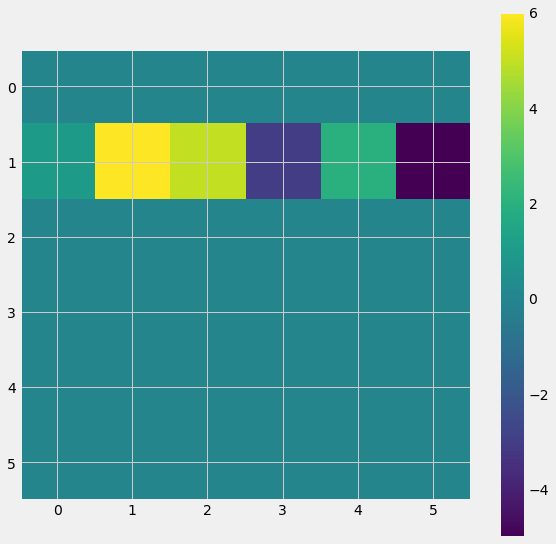

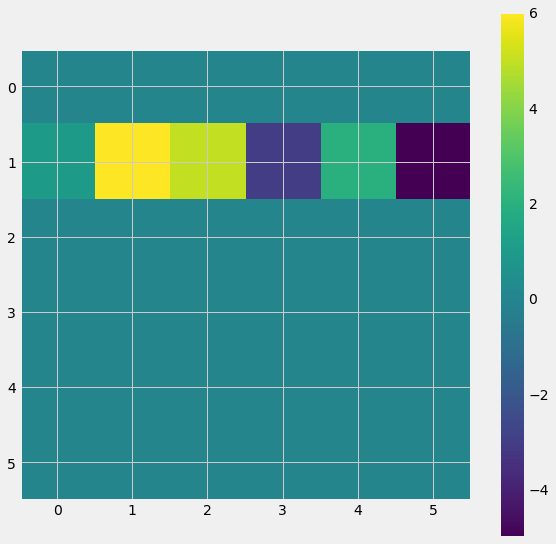

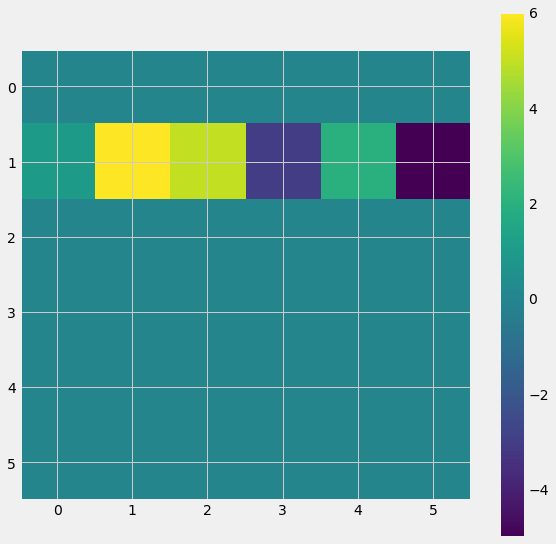

In [326]:
plt.imshow(tst[2]-tst[4])
plt.colorbar()
plt.show()
plt.imshow(tst2[2]-tst2[4])
plt.colorbar()
plt.show()
plt.imshow(tst3[2]-tst3[4])
plt.colorbar()
plt.show()

In [310]:
opp

[0, 3, 4, 1, 2, 7, 8, 5, 6]

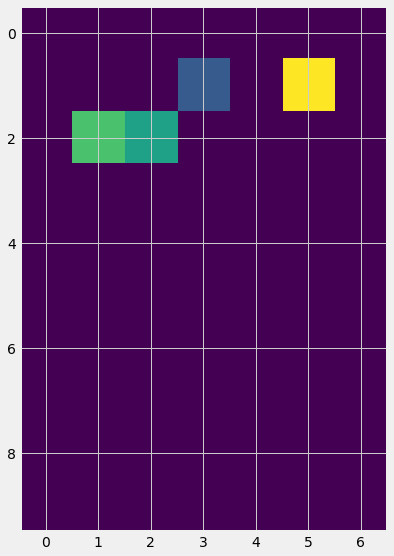

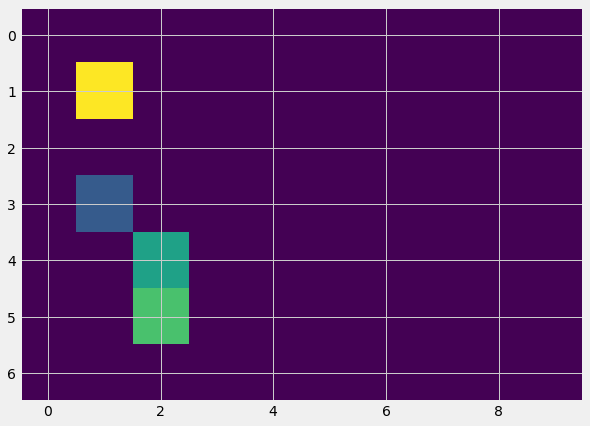

In [352]:

plt.imshow(np.flipud(tst[2].T))
plt.show()

plt.imshow(np.flipud(tst[2].T))
plt.show()

plt.imshow(np.flipud(tst[2].T))
plt.show()

In [359]:
lx=100;
ly=40;
w=np.array([4/9,1/9,1/9,1/9,1/9,1/36,1/36,1/36,1/36])
ex=[0,1,0,-1,0 ,1,-1,-1, 1];
ey=[0,0,1,0 ,-1,1, 1,-1,-1];
tau=1;
g=10^-4;
cs=1/np.sqrt(3)
tstep=100
Nsteps = tstep
tplot=100

# % arrays
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
f=np.zeros([Nsteps, 9,lx,ly+2]);
opp=[0, 3, 4, 1, 2, 7, 8, 5, 6]
# print(np.array(opp)-1)


for k in range(0,9):
    f[0,k,:,1:-1] = w[k]*rho

In [5]:
def calc_macro(f,rho,u,v):
    # f should be at a given time step
    u[:,:] = 0
    v[:,:] = 0
#     print(f[:].shape)
#     print(f[:,:,1:-1].shape)
#     print(f[:][1,1:-1].shape)
    rho = np.sum(f[:,:,1:-1],axis=0)
    for k in range(9):
        v += f[k,:,1:-1]*ex[k]
        u += f[k,:,1:-1]*ey[k]
    u=u/rho
    v=v/rho
    return rho, u ,v

def update(tst):
    # assumes its receiving a padded array
    for i in range(5):
        for k in range(9):
            tst[k,i,0] = tst[opp[k],i,1]
            tst[k,i,ly] = tst[opp[k],i,ly-1]
    
    for k in range(5):
        tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))

    return tst
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
f=np.zeros([Nsteps, 9,lx,ly+2]);

for k in range(0,9):
    f[0,k,:,1:-1] = w[k]*rho
for ts in range(1,4):
    
    # Calc Macro Quantities
    rho, u, v = calc_macro(f[ts-1],rho,u,v)

    # Collision
    for i in range(1,lx):
        for j in range(1,ly):
            u[i,j]=u[i,j] + g*tau/rho[i,j];
            for k in range(9):
                cu=(1/cs**2)*(ex[k]*u[i,j] + ey[k]*v[i,j]);
                feq=np.array(rho[i,j]*w[k]*(1 + cu + cu**2 - (u[i,j]**2 + v[i,j]**2)/(2*cs**2)))
                f[ts,k,i,j]=f[ts-1,k,i,j] + (1/tau)*(feq - f[ts-1,k,i,j]);

    print(f[ts,2,0:5,:].shape)
    #move
    f[ts] = move(f[ts])
    print(f[ts][2])
    
# print(np.sum(f[ts],axis=0))

(5, 42)


IndexError: index 100 is out of bounds for axis 1 with size 100

In [ ]:
def move_bc(f):
    for i in range(1, lx): # Bounce back
        f[4,i,ly] = f[2,i,ly]
        f[8,i,ly] = f[6,i,ly]
        f[7,i,ly] = f[5,i,ly]
    # SOUTH solid
    for i in range(1, lx):
        f[2,i,0] = f[4,i,0]
        f[6,i,0] = f[8,i,0]
        f[5,i,0] = f[7,i,0]
    
def move(f):

    # This can't be parallelized without making a copy...order of loops is super important!
    for j in range(ly,0,-1): # Up, up-left
        for i in range(0, lx):
            f[2,i,j] = f[2,i,j-1]
            f[6,i,j] = f[6,i+1,j-1]
    for j in range(ly,0,-1): # Right, up-right
        for i in range(lx,0,-1):
            f[1,i,j] = f[1,i-1,j]
            f[5,i,j] = f[5,i-1,j-1]
    for j in range(0,ly): # Down, right-down
        for i in range(lx,0,-1):
            f[4,i,j] = f[4,i,j+1]
            f[8,i,j] = f[8,i-1,j+1]
    for j in range(0,ly): # Left, left-down
        for i in range(0, lx):
            f[3,i,j] = f[3,i+1,j]
            f[7,i,j] = f[7,i+1,j+1]


[array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]]), array([[ 208.61111111,  250.33333333,  250.33333333, ...,  250.33333333,
         208.61111111,  121.83333333],
       [ 151.        ,  151.        ,  151.        , ...,  151.        ,
         157.66666667,  151.        ],
       [ 151.        ,  151.        ,  151.        , ...,  151.        ,
         151.        ,  151.        ],
       ..., 
       [ 167.55555556,  151.        ,  151.        , ...,  151.        ,
         167.55555556,    8.61111111],
       [ 167.55555556,  151.        ,  151.        , ...,  151.        ,
         167.55555556,    8.61111111],
       [ 167.55555556,  151.        ,  151.        , ...,  151.        ,
         167.55555556,   75.36111111]]), array([[  45.0459897 ,   50.44115

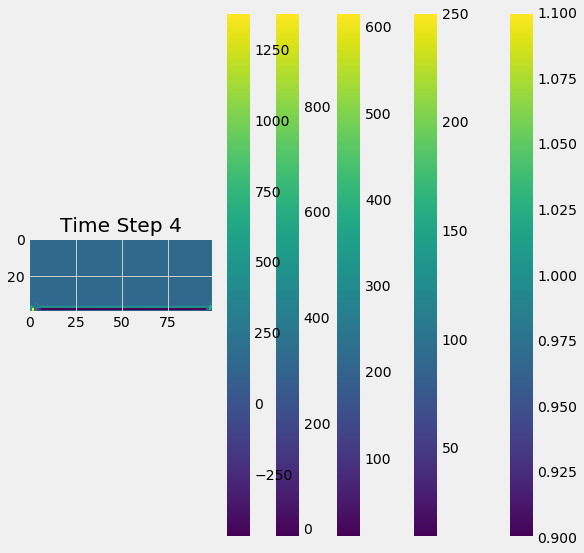

In [374]:
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
# print(f[4])
pt_lst = []
for i in range(5):
    rho, u ,v = calc_macro(f[i],rho,u,v)
    plt.imshow(rho.T)
    plt.title("Time Step {:}".format(i))
    plt.colorbar()
    plt.savefig("garbage{:}.png".format(i))
    pt_lst.append(rho)
print(pt_lst)

In [16]:
def update(tst):
    # assumes its receiving a padded array
    for i in range(5):
        for k in range(9):
            tst[k,i,0] = tst[opp[k],i,1]
            tst[k,i,ly] = tst[opp[k],i,ly-1]
    
    for k in range(5):
        tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))

    return tst

ly = 5
lx = 10
tst = np.zeros([9,lx,ly+2])
tst[2,1,1]=2
tst[2,1,3] = 7
tst[4,2,1]=4
tst[4,2,2]=5
tst[4,2,3]=6

print(np.flipud(tst[2][:,1:ly+1].T))
print()
print(np.flipud(tst[4][:,1:ly+1].T))
tst = update(tst)

print(40*"=")
print()
print(np.flipud(tst[2][:,1:ly+1].T))
print()
print(np.flipud(tst[4][:,1:ly+1].T))

print(40*"=")
tst = update(tst)

print(np.flipud(tst[2][:,1:ly+1].T))
print()
print(np.flipud(tst[4][:,1:ly+1].T))

print(40*"=")
tst = update(tst)

print(np.flipud(tst[2][:,1:ly+1].T))
print()
print(np.flipud(tst[4][:,1:ly+1].T))

print(40*"=")
tst = update(tst)

print(np.flipud(tst[2][:,1:ly+1].T))
print()
print(np.flipud(tst[4][:,1:ly+1].T))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0

In [87]:
def calc_macro(f,rho,u,v):
    # f should be at a given time step
    u[:,:] = 0
    v[:,:] = 0
    
    rho = np.sum(f,axis=0)
    for k in range(9):
        u += f[k]*ex[k]
#         print(ey[k])
        v += f[k]*ey[k]
    u=u/rho
    v=v/rho
    return rho, u ,v

def update(tst):
    # assumes its receiving a padded array
    for i in range(5):
        for k in range(9):
            tst[k,i,0] = tst[opp[k],i,1]
            tst[k,i,ly] = tst[opp[k],i,ly-1]
    
    for k in range(5):
        tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))

    return tst

def update2(tst):
    out = tst.copy()
    for i in range(lx):
        for k in range(9):
            out[k,i,0] = tst[opp[k],i,0]
            out[k,i,ly-1] = tst[opp[k],i,ly-1]
#     print('---')
#     print(np.flipud(tst[4].T))
#     print()
    for k in range(5):
        out[k,:,:]=np.roll(out[k,:,:],(ex[k],ey[k]),axis=(0,1))

    return out

lx = 100
ly = 20
Nsteps = 1000
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
f=np.zeros([Nsteps, 9,lx,ly]);

for k in range(0,9):
    f[0,k] = w[k]*rho
for ts in range(1,Nsteps):
    prog_bar(ts,Nsteps,msg = "")
    # Calc Macro Quantities
    rho, u, v = calc_macro(f[ts-1],rho,u,v)

    # Collision
    for i in range(0,lx):
        for j in range(0,ly):
            u[i,j]=u[i,j] + g*tau/rho[i,j];
            for k in range(9):
                cu=(1/cs**2)*(ex[k]*u[i,j] + ey[k]*v[i,j]);
                feq=np.array(rho[i,j]*w[k]*(1 + cu + cu**2 - (u[i,j]**2 + v[i,j]**2)/(2*cs**2)))
                f[ts,k,i,j]=f[ts-1,k,i,j] + (1/tau)*(feq - f[ts-1,k,i,j])

    #move
    f[ts] = update2(f[ts])
# u(i,j)=(f(1,i,j)-f(3,i,j)+f(5,i,j)-f(6,i,j)-f(7,i,j)+f(8,i,j))print(f[3][2])
print(np.sum(f[ts],axis=0))

[====================] 1000/1000   [[ 3.12221976  3.16607487  3.16610208 ...,  3.16610208  3.16607487
   3.12221976]
 [ 3.12221976  3.16607487  3.16610208 ...,  3.16610208  3.16607487
   3.12221976]
 [ 3.12221976  3.16607487  3.16610208 ...,  3.16610208  3.16607487
   3.12221976]
 ..., 
 [ 3.12221976  3.16607487  3.16610208 ...,  3.16610208  3.16607487
   3.12221976]
 [ 3.12221976  3.16607487  3.16610208 ...,  3.16610208  3.16607487
   3.12221976]
 [ 3.12221976  3.16607487  3.16610208 ...,  3.16610208  3.16607487
   3.12221976]]


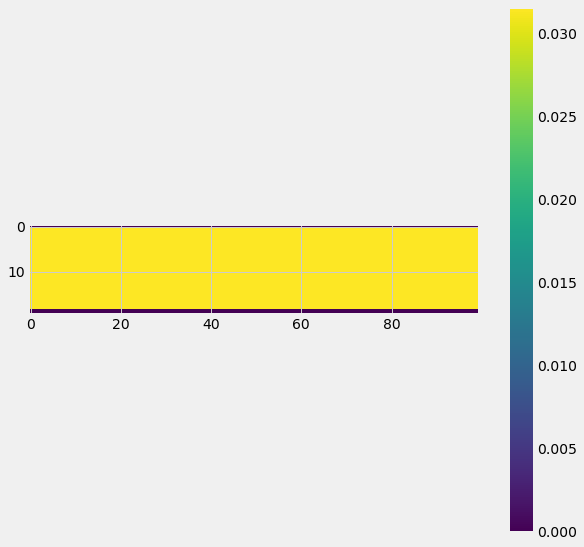

In [93]:
plt.imshow(calc_macro(f[-1],rho,u,v)[1].T)
plt.colorbar()

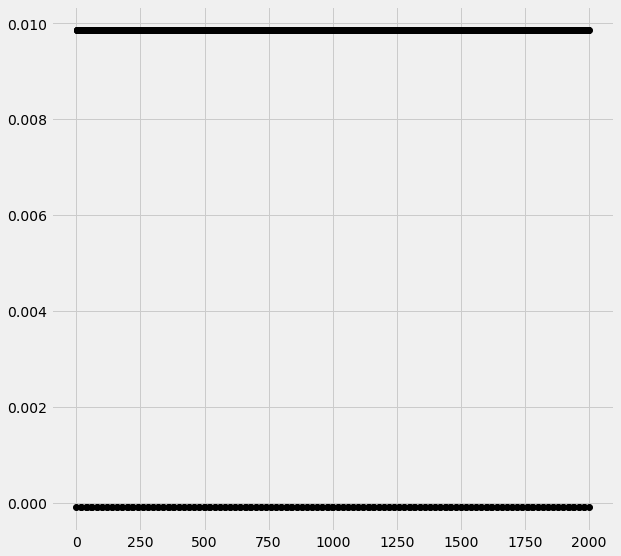

In [78]:
plt.plot(calc_macro(f[-1],rho,u,v)[1].flatten(),'ko')

In [42]:
def calc_macro(f,rho,u,v):
    # f should be at a given time step
    u[:,:] = 0
    v[:,:] = 0
    
    rho = np.sum(f[:,:,1:-1],axis=0)
    for k in range(9):
        u += f[k,:,1:-1]*ex[k]
#         print(ey[k])
        v += f[k,:,1:-1]*ey[k]
    u=u/rho
    v=v/rho
    return rho, u ,v

def update(tst):
    # assumes its receiving a padded array
    for i in range(5):
        for k in range(9):
            tst[k,i,0] = tst[opp[k],i,1]
            tst[k,i,ly] = tst[opp[k],i,ly-1]
    
    for k in range(5):
        tst[k,:,:]=np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))

    return tst
lx = 10
ly = 5
Nsteps = 10
rho=np.ones([lx,ly]);
u=np.zeros([lx,ly]);
v=np.zeros([lx,ly]);
f=np.zeros([Nsteps, 9,lx,ly+2]);

for k in range(0,9):
    f[0,k,:,1:-1] = w[k]*rho
calc_macro(f[0],rho,u,v)[2]

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [60]:
def update2(tst):
    out = tst.copy()
    for i in range(lx):
        for k in range(9):
            out[k,i,0] = tst[opp[k],i,0]
            out[k,i,ly-1] = tst[opp[k],i,ly-1]
#     print('---')
#     print(np.flipud(tst[4].T))
#     print()
    for k in range(5):
        out[k,:,:]=np.roll(out[k,:,:],(ex[k],ey[k]),axis=(0,1))

    return out

ly = 5
lx = 10
tst = np.zeros([9,lx,ly])
tst[2,1,1]=2
tst[2,1,3] = 7
tst[4,2,1]=4
tst[4,2,2]=5
tst[4,2,3]=6

print(np.flipud(tst[2].T))
print()
print(np.flipud(tst[4].T))
tst = update2(tst)

print(40*"=")
print()
print(np.flipud(tst[2].T))
print()
print(np.flipud(tst[4].T))

print(40*"=")
tst = update2(tst)

print(np.flipud(tst[2].T))
print()
print(np.flipud(tst[4].T))

print(40*"=")
tst = update2(tst)

print(np.flipud(tst[2].T))
print()
print(np.flipud(tst[4].T))

print(40*"=")
tst = update2(tst)

print(np.flipud(tst[2].T))
print()
print(np.flipud(tst[4].T))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  7.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0

In [ ]:

ly = 5
lx = 10
tst = np.zeros([9,lx,ly])
tst[2,1,1]=2
tst[2,1,3] = 7
tst[4,2,1]=4
tst[4,2,2]=5
tst[4,2,3]=6
print()
for i in range(lx):
    for k in range(9):
        tst[k,i,0] = tst[opp[k],i,0]
        tst[k,i,ly-1] = tst[opp[k],i,ly-1]

plot


C:\Users\ianhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


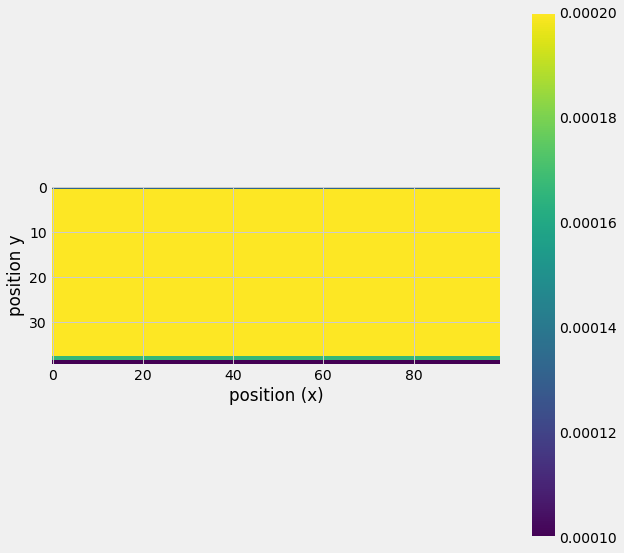

plot


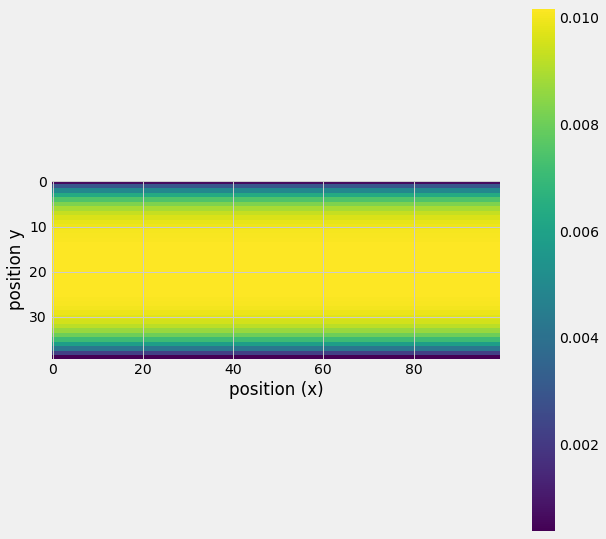

plot


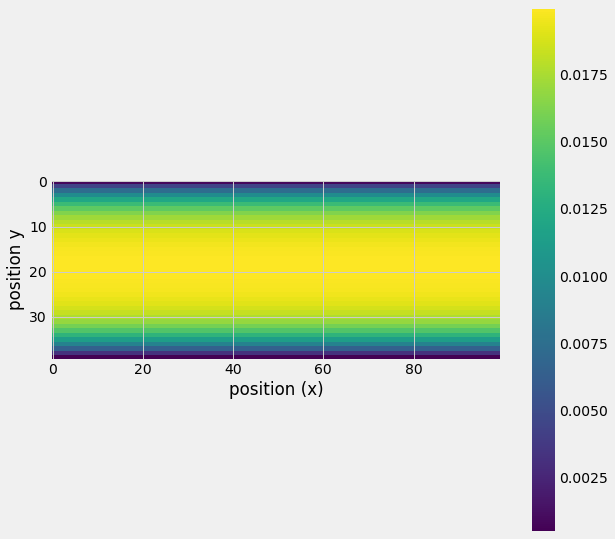

plot


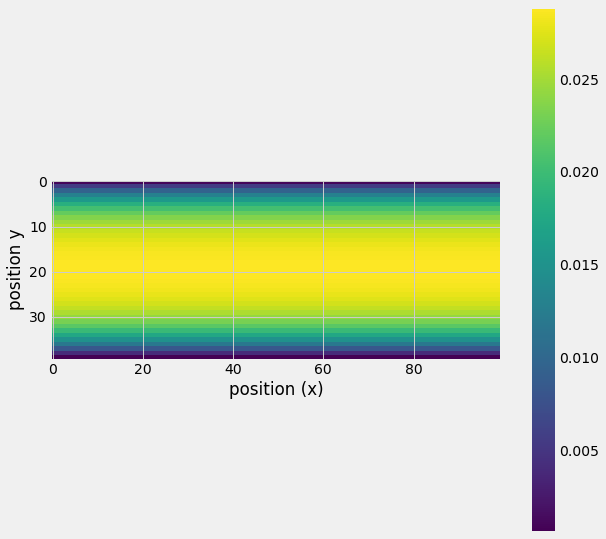

plot


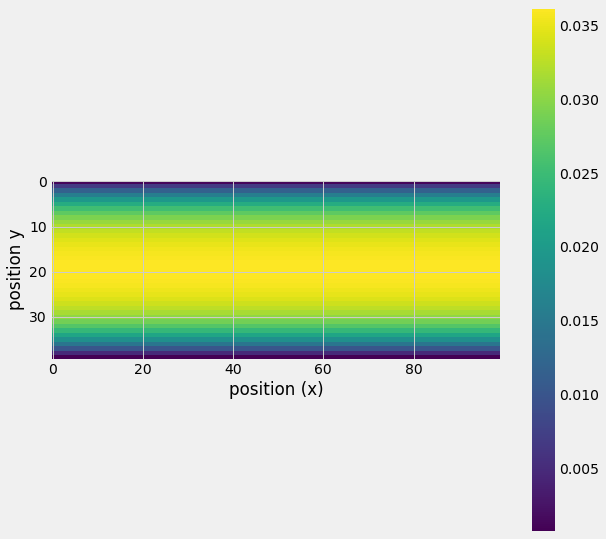

In [101]:
lx = 100
ly = 40
w = [4./9,1./9,1./9,1./9,1./9,1./36,1./36,1./36,1./36] 
ex = [0,1,0,-1,0,1,-1,-1,1]
ey = [0,0,1,0,-1,1,1,-1,-1]
tau = 1.
g=1.0e-4
cs=1./np.sqrt(3)

tstep = 500
tplot = 100

# arrays
lxplot = np.linspace(0,lx,lx)
lyplot = np.linspace(0,ly,ly)

rho = np.ones((lx,ly))
u = np.zeros((lx,ly))
v = np.zeros((lx,ly))
f_in = np.zeros((9,lx,ly))

opp = [0,3,4,1,2,7,8,5,6]
w = [4./9,1./9,1./9,1./9,1./9,1./36,1./36,1./36,1./36] 

# initialization
for kk in range(0,9):  
    f_in[kk,:,:] = w[kk]*rho

f_out = f_in   # PBC 

# main loop
for tt in range(0,tstep):
    # macroscopic
    
    rho, u, v = calc_macro(f_in,rho,u,v)
#     for ii in range(0,lx):
#         for jj in range(0,ly): 
#             rho[ii,jj] = 0
#             u[ii,jj] = 0
#             v[ii,jj] = 0 
            
#             for kk in range (0,9):
#                 rho[ii,jj] = rho[ii,jj] + f_in[kk,ii,jj]
#                 u[ii,jj] = u[ii,jj] + f_in[kk,ii,jj]*ex[kk]
#                 v[ii,jj] = v[ii,jj] + f_in[kk,ii,jj]*ey[kk]

#             u[ii,jj] = u[ii,jj]/rho[ii,jj]
#             v[ii,jj] = v[ii,jj]/rho[ii,jj]

    # collision
    for ii in range(0,lx): 
        for jj in range(0,ly): 
            u[ii,jj] = u[ii,jj] + g*tau/rho[ii,jj]
            for kk in range(0,9): 
                cu = (1./cs**2)*(ex[kk]*u[ii,jj] + ey[kk]*v[ii,jj])
                feq = rho[ii,jj]*w[kk]*(1. + cu + cu**2 - ((1.*u[ii,jj]**2) + (1.*v[ii,jj])**2)/(2.*cs**2))
                f_in[kk,ii,jj] = f_in[kk,ii,jj] + (1./tau)*(feq - f_in[kk,ii,jj])

    # prepare the next time step
    fout = f_in
    
    # boundary
    # north & south
    for ii in range(0,lx): 
        for kk in range(0,9): 
            fout[kk,ii,ly-1] = f_in[opp[kk],ii,ly-1]
            fout[kk,ii,0] = f_in[opp[kk],ii,0]

    # streaming
    for kk in range(0,9): 
        f_in[kk,:,:] = np.roll(fout[kk,:,:],(ex[kk],ey[kk]),(0,1))
#         f_in[kk,:,:] np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))
#         f_in[kk,:,:] = np.roll(fout[kk,:],ex[kk])
#         for jj in range(0,lx):
#                 f_in[kk,jj,:] = np.roll(fout[kk,jj,:],ey[kk])

    # plot the output
    if (tt % tplot)==1: 
        ## plotting 
        print('plot')
        plt.imshow(np.flipud(u.T))
        plt.xlabel("position (x)")    
        plt.ylabel("position y")
        plt.legend(loc='best')
        plt.colorbar()
        plt.show()

[====================] 1050/1050   

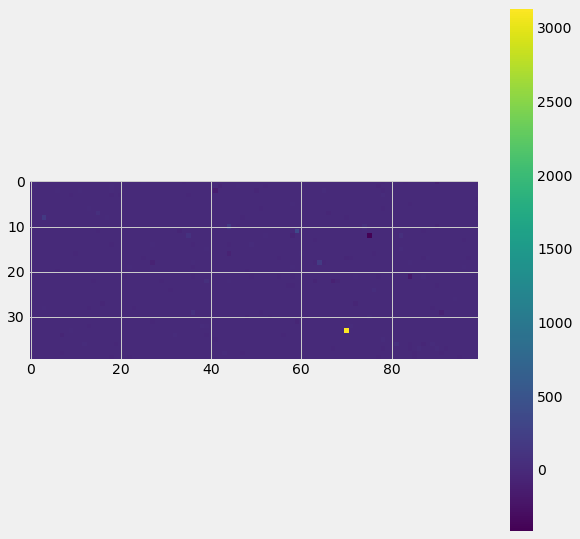

In [3]:
def calc_macro(f,rho,u,v):
    # f should be at a given time step
    u[:,:] = 0
    v[:,:] = 0
    
    rho = np.sum(f,axis=0)
    for k in range(9):
        u += f[k]*ex[k]
#         print(ey[k])
        v += f[k]*ey[k]
    u=u/rho
    v=v/rho
    return rho, u ,v

lx = 100
ly = 40
w = [4./9,1./9,1./9,1./9,1./9,1./36,1./36,1./36,1./36] 
ex = [0,1,0,-1,0,1,-1,-1,1]
ey = [0,0,1,0,-1,1,1,-1,-1]
tau = 1.
g=1.0e-4
cs=1./np.sqrt(3)

tstep = 1050
Nsteps = tstep
tplot = 100

rho = np.ones([lx,ly])
u = np.zeros([lx,ly])
v = np.zeros([lx,ly])
f_in = np.zeros([Nsteps, 9,lx,ly])
bound_array = np.zeros([lx,ly])
bound_array[:,0] = 1
bound_array[:,-1] = 1
bound_array[20:25,20:25]=1
opp = [0,3,4,1,2,7,8,5,6]
w = [4./9,1./9,1./9,1./9,1./9,1./36,1./36,1./36,1./36] 

# initialization
for kk in range(0,9):  
    f_in[0,kk,:,:] = w[kk]*rho

# f_out = f_in   # PBC 

# main loop
for ts in range(1,tstep):
    # macroscopic
    prog_bar(ts,Nsteps)
    rho, u, v = calc_macro(f_in[ts-1],rho,u,v)

    # collision
    u = u + g*tau/rho
    for k in range(0,9):
        cu = (1./cs**2)*(ex[k]*u+ey[k]*v)
        feq = rho*w[k]*(1.+cu+cu**2-(u**2+v**2)/(2*cs**2))
        f_in[ts, k, :,:] = f_in[ts-1,k,:,:] +(1./tau)*(feq-f_in[ts-1,k,:,:])
    
                
    # prepare the next time step
    fout = f_in[ts]
    
    # boundary
    # north & south
    for k in range(0,9):
        fout[k][bound_array == 1] = f_in[ts,opp[k]][bound_array == 1]
#         fout[k,:,ly-1] = f_in[ts,opp[k],:,ly-1]
#         fout[k,:,0] = f_in[ts,opp[k],:,0]
        
#     for ii in range(0,lx): 
#         for kk in range(0,9): 
#             fout[kk,ii,ly-1] = f_in[opp[kk],ii,ly-1]
#             fout[kk,ii,0] = f_in[opp[kk],ii,0]

    # streaming
    for kk in range(0,9): 
        f_in[ts,kk,:,:] = np.roll(fout[kk,:,:],(ex[kk],ey[kk]),(0,1))
#         f_in[kk,:,:] np.roll(tst[k,:,:],(ex[k],ey[k]),axis=(0,1))
#         f_in[kk,:,:] = np.roll(fout[kk,:],ex[kk])
#         for jj in range(0,lx):
#                 f_in[kk,jj,:] = np.roll(fout[kk,jj,:],ey[kk])

    # plot the output
rho, u,v = calc_macro(f_in[-200],rho,u,v)
plt.imshow(u.T)
plt.colorbar()
plt.show()

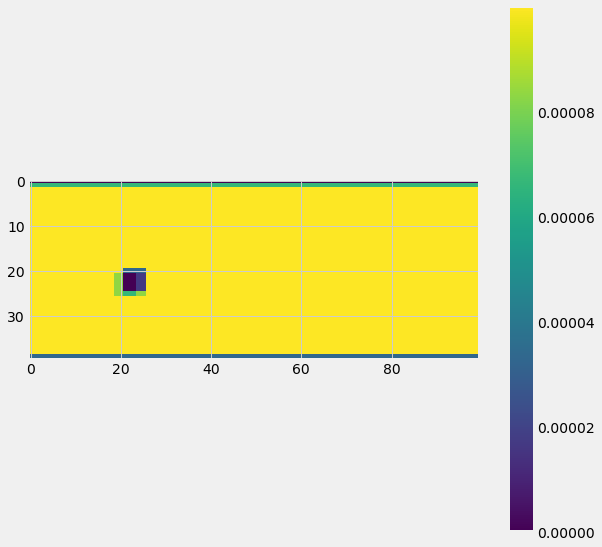

In [15]:
rho, u,v = calc_macro(f_in[1],rho,u,v)
plt.imshow(u.T)
plt.colorbar()
plt.show()

In [ ]:
list_of_ims = []
for i in range(1,1000):
    prog_bar(i,1000)
    list_of_ims.append(plt.imshow(calc_macro(f_in[i],rho,u,v)[1].T))
    plt.close()

[====================] 1000/1000   

In [ ]:
print(asdf)

KeyboardInterrupt: 

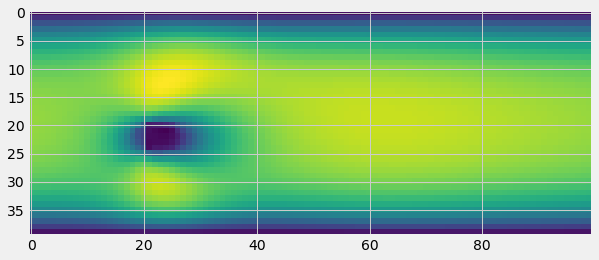

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(calc_macro(f_in[1],rho,u,v)[1].T, animated=True)
iters = 0

def updatefig(*args):
    plt.imshow(calc_macro(f_in[args[0]],rho,u,v)[1].T)
    return im

anim = animation.FuncAnimation(fig, updatefig,frames=range(1,1000))
HTML(anim.to_html5_video())

In [23]:
animation.FuncAnimation?